# Analisis Alghi

Mari kita coba dengan terlebih dahulu membuat DataFrame menggunakan metode `read_sql_query ()` yang telah kita kenal. Kami ingin mengembangkan laporan visualisasi penjualan sederhana dari 5 pasar utama utama kami (kolom `Negara` di` pelanggan`) yang diberi peringkat oleh Penjualan (kolom `Total` di` faktur`).

Kami juga ingin mengidentifikasi 5 pelanggan teratas kami dengan nama (`FirstName`,` LastName`) dalam laporan.

Terakhir tetapi tidak kalah pentingnya, kami ingin laporan menyertakan analisis harian tentang kinerja penjualan, dan untuk itu kami akan memerlukan kolom `InvoiceDate`.

1. Manakah dari pelanggan berikut ini di antara 5 pelanggan teratas yang diberi peringkat berdasarkan total masing-masing (`Total`)? Pilih semua yang berlaku.
    - [ ] Victor Stevens
    - [ ] Hugh O'Reilly
    - [ ] Puja Srivastava
    - [ ] Ellie Sullivan

2. Manakah dari negara-negara berikut ini yang termasuk dalam top 5 terlaris berdasarkan total masing-masing (`Total`)? Pilih semua yang berlaku.
    - [ ] Britania Raya
    - [ ] Jerman
    - [ ] Portugal
    - [ ] India
    
3. Berapa banyak transaksi penjualan (atau catatan, atau baris) dari 5 negara teratas?

4. Dengan menggunakan metode `pd.pivot_table ()`, jawab dua pertanyaan berikutnya
    - 4.1 Berapa banyak penjualan yang kami hasilkan secara total (`Total`) dari pasar Prancis pada hari Selasa?
    - 4.2 Berapa total penjualan yang kami hasilkan (`Total`) dari semua 5 pasar teratas yang digabungkan pada hari Jumat?
    

5. Berikan `pivot_table` yang Anda buat nama. Hapus margin jika dimasukkan dalam langkah sebelumnya. Buat visualisasi dengan merantai metode `.plot ()` di tabel pivot. Setel parameter `kind` menjadi salah satu dari:
    - `line`
    - `bar`
    - `hist`
    - `box`
    
Jenis plot apa yang digunakan ialah ?
    - [ ] `hist`
    - [ ] `box`
    - [ ] `bar`
    - [ ] `pencar`
    - [ ] `line`

# ANSWER

In [1]:
import pandas as pd
import sqlite3
conn = sqlite3.connect("data_input/chinook.db")
a = pd.read_sql_query('Select \
    c.FirstName, c.LastName, c.CustomerId, c.Country ,i.invoiceDate, i.Total \
    From customers As c \
    Left Join invoices As i On c.CustomerId = i.CustomerId \
    Order By total Desc',
conn, parse_dates=['InvoiceDate'])
a.head()

,FirstName,LastName,CustomerId,Country,InvoiceDate,Total
0,Helena,Holý,6,Czech Republic,2013-11-13,25.86
1,Richard,Cunningham,26,USA,2012-08-05,23.86
2,Ladislav,Kovács,45,Hungary,2010-02-18,21.86
3,Hugh,O'Reilly,46,Ireland,2011-04-28,21.86
4,Astrid,Gruber,7,Austria,2010-01-18,18.86


In [2]:
a.shape

(412, 6)

1. Manakah dari pelanggan berikut ini di antara 5 pelanggan teratas yang diberi peringkat berdasarkan total masing-masing (`Total`)? Pilih semua yang berlaku.
    - [ ] Victor Stevens
    - [x] Hugh O'Reilly
    - [ ] Puja Srivastava
    - [ ] Ellie Sullivan

In [10]:
conn = sqlite3.connect("data_input/chinook.db")
b = pd.read_sql_query('SELECT i.*, c.Country \
                      From invoices As i \
                      Left Join customers As c on c.CustomerId = i.CustomerId',conn, parse_dates='InvoiceDate')
b.tail(3)

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total,Country
409,410,35,2013-12-09,"Rua dos Campeões Europeus de Viena, 4350",Porto,None,Portugal,None,8.91,Portugal
410,411,44,2013-12-14,Porthaninkatu 9,Helsinki,None,Finland,00530,13.86,Finland
411,412,58,2013-12-22,"12,Community Centre",Delhi,None,India,110017,1.99,India


In [11]:
b.shape

(412, 10)

2. Manakah dari negara-negara berikut ini yang termasuk dalam top 5 terlaris berdasarkan total masing-masing (`Total`)? Pilih semua yang berlaku.
    - [ ] United Kingdom
    - [x] Germany
    - [ ] Portugal
    - [ ] India

In [12]:
top5 = b.groupby('Country')['Total'].sum().sort_values(ascending=False).head(5).index.to_list()

top5

['USA', 'Canada', 'France', 'Brazil', 'Germany']

In [13]:
top5 = b[b['Country'].isin(top5)].copy()
top5.shape

(245, 10)

In [14]:
top5['InvoiceDOW'] = top5['InvoiceDate'].dt.weekday_name
top5['InvoiceDOW'] = pd.Categorical(top5.InvoiceDOW, categories=['Monday', 'Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], ordered=True)
top5.shape 

(245, 11)

3. Berapa banyak transaksi penjualan (atau catatan, atau baris) dari 5 negara teratas?
    - Jawaban: Yang tercatat sebanyak 245 dengan rows 10

4. Dengan menggunakan metode `pd.pivot_table ()`, jawab dua pertanyaan berikutnya
    - 4.1 Berapa banyak penjualan yang kami hasilkan secara total (`Total`) dari pasar Prancis pada hari Selasa?
    - 4.2 Berapa total penjualan yang kami hasilkan (`Total`) dari semua 5 pasar teratas yang digabungkan pada hari Jumat?

In [16]:
#b = b.loc[b["Country"] == "France",]
##c = pd.pivot_table(b,
              #index='CustomerId',
              #values='Total',
              #aggfunc='sum')
pd.pivot_table(
    data=top5,
    index='Country',
    columns='InvoiceDOW',
    values='Total',
    aggfunc=sum,
    margins=True)

InvoiceDOW,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,All
Country,,,,,,,,
Brazil,19.80,1.98,26.73,45.56,16.83,63.36,15.84,190.10
Canada,43.56,22.78,90.09,43.58,58.41,23.76,21.78,303.96
France,25.75,1.98,11.88,47.52,1.98,87.15,18.84,195.10
Germany,64.35,9.90,24.75,3.96,8.91,38.67,5.94,156.48
USA,19.80,123.77,41.62,77.27,87.18,23.76,149.66,523.06
All,217.89,160.41,173.31,173.26,236.70,212.06,195.07,1368.70


-France total sales on tuesday is 1.98

-Total sales from top 5 country on Friday is 173.31

5. Berikan `pivot_table` yang Anda buat nama. Hapus margin jika dimasukkan dalam langkah sebelumnya. Buat visualisasi dengan merantai metode `.plot ()` di tabel pivot. Setel parameter `kind` menjadi salah satu dari:
    - `line`
    - `bar`
    - `hist`
    - `box`
    
Jenis plot apa yang digunakan ialah :
    - [x] `hist`
    - [ ] `box`
    - [x] `bar`
    - [ ] `scatter`
    - [x] `line`

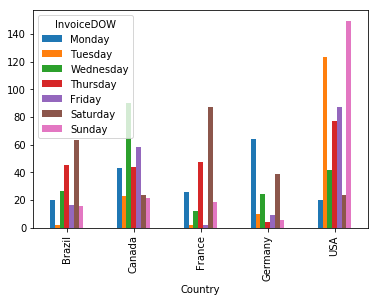

In [19]:
c = pd.pivot_table(
    data=top5,
    index='Country',
    columns='InvoiceDOW',
    values='Total',
    aggfunc=sum)
c.plot(kind='bar')

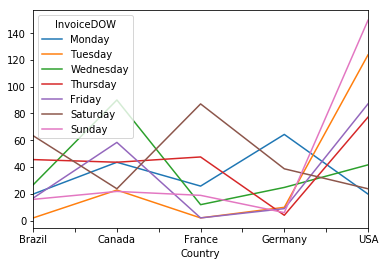

In [20]:
c.plot(kind='line')

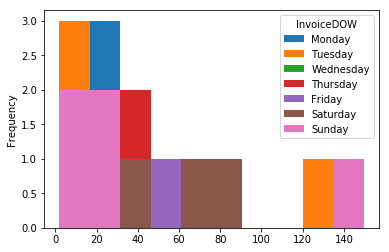

In [21]:
c.plot(kind='hist')